In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy.sql.expression import cast

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




In [11]:
# Calculate the date one year from the last date in data set.
session.query(Measurement.date).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()

[('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08

In [12]:
date_and_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').all()
    #order_by(Measurement.date).all()

prcp_rows = [{"Date": result[0], "precipitation": result[1]} for result in date_and_prcp]
prcp_rows

prcp_df = pd.DataFrame(prcp_rows).set_index("Date").dropna(how='any')

In [13]:
sorted_prcp_df = prcp_df.sort_index()
sorted_prcp_df

,precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


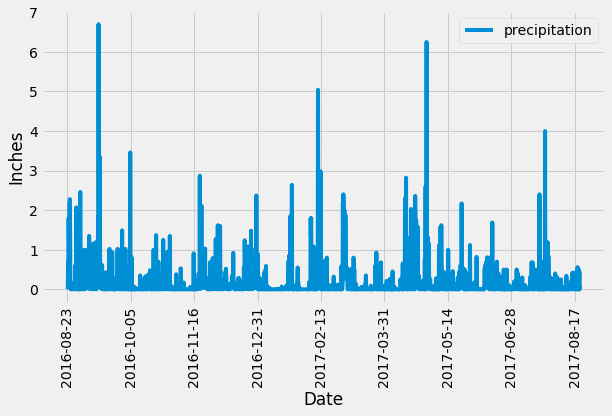

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_prcp_df.plot(figsize=(9, 5))
plt.xticks(rotation = 90)
plt.ylabel("Inches")
plt.show()

In [15]:
pd.DataFrame(prcp_df).describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [17]:
columns = inspector.get_columns('station')
for c in columns:
    print (c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [18]:
columns = inspector.get_columns('measurement')
for c in columns:
    print (c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [19]:
# Design a query to calculate the total number stations in the dataset
total_number_stations = session.query(Station.station).distinct().count()
total_number_stations

9

In [20]:
# Checking Number of Rows

# session.query(Measurement.station).\
#     filter(Measurement.station == 'USC00511918').count()

# session.query(Measurement.station).\
#     filter(Measurement.station == 'USC00517948').count()

In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(Measurement.station, func.min(Measurement.tobs),
             func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [23]:
# Checking Active Station With otbs For Each Date From 2016-08-18

# session.query(Measurement.station, Measurement.tobs, Measurement.date).\
#     filter(Measurement.station == 'USC00519281').\
#     filter(Measurement.date >= '2016-08-18').\
#     order_by(Measurement.date.desc()).all()

In [24]:
# Query the last 12 months of temperature observation data for this station
temp = session.query(cast(Measurement.tobs, sqlalchemy.Integer)).\
                     filter(Measurement.station == 'USC00519281').\
                     filter(Measurement.date >= '2016-08-18').\
                     order_by(Measurement.tobs.asc()).all()
# temp

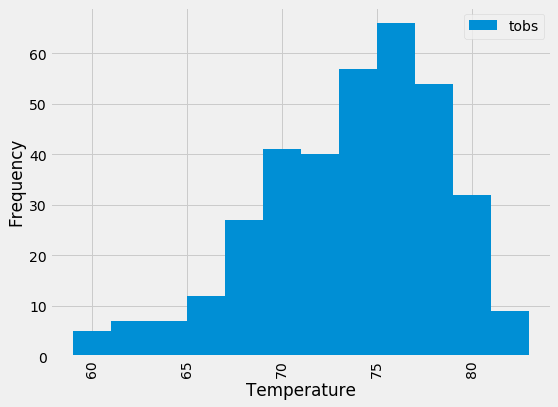

In [25]:
# Using the most active station id
# plot the results as a histogram

pd.DataFrame(temp).plot.hist(bins=12, figsize=(8, 6))
plt.xticks(rotation = 90)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.show()

In [64]:
calulation = session.query(Measurement.date, func.min(Measurement.tobs),
                            func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                          filter(Measurement.date >= '2017-03-11').\
                          order_by(Measurement.date.desc()).all()
calulation

[('2017-05-23', 58.0, 76.04550155118925, 87.0)]

In [56]:
(81+82+82+76)/4

80.25

In [66]:
calulation1 = session.query(Measurement.date, Measurement.tobs).\
                          filter(Measurement.date >= '2017-03-11').\
                          order_by(Measurement.date.desc()).all()
calulation1

[('2017-08-23', 81.0),
 ('2017-08-23', 82.0),
 ('2017-08-23', 82.0),
 ('2017-08-23', 76.0),
 ('2017-08-22', 82.0),
 ('2017-08-22', 82.0),
 ('2017-08-22', 76.0),
 ('2017-08-21', 81.0),
 ('2017-08-21', 79.0),
 ('2017-08-21', 82.0),
 ('2017-08-21', 76.0),
 ('2017-08-20', 81.0),
 ('2017-08-20', 80.0),
 ('2017-08-20', 78.0),
 ('2017-08-19', 79.0),
 ('2017-08-19', 80.0),
 ('2017-08-19', 85.0),
 ('2017-08-19', 71.0),
 ('2017-08-18', 80.0),
 ('2017-08-18', 77.0),
 ('2017-08-18', 79.0),
 ('2017-08-18', 76.0),
 ('2017-08-17', 78.0),
 ('2017-08-17', 83.0),
 ('2017-08-17', 76.0),
 ('2017-08-17', 72.0),
 ('2017-08-16', 82.0),
 ('2017-08-16', 79.0),
 ('2017-08-16', 76.0),
 ('2017-08-16', 71.0),
 ('2017-08-15', 78.0),
 ('2017-08-15', 82.0),
 ('2017-08-15', 79.0),
 ('2017-08-15', 77.0),
 ('2017-08-15', 70.0),
 ('2017-08-14', 79.0),
 ('2017-08-14', 81.0),
 ('2017-08-14', 75.0),
 ('2017-08-14', 77.0),
 ('2017-08-14', 79.0),
 ('2017-08-13', 81.0),
 ('2017-08-13', 81.0),
 ('2017-08-13', 84.0),
 ('2017-08-

In [40]:
session.query(Measurement.date, Measurement.tobs).order_by(Measurement.date.desc()).first()

('2017-08-23', 81.0)

In [59]:
calulationlist = [{"Date":result[0], "TMIN":result[1],
                 "TAVG":result[2], "TMAX":result[3]} for result in calulation]

calulationlist

[{'Date': '2017-08-22', 'TMIN': 76.0, 'TAVG': 80.14285714285714, 'TMAX': 82.0}]

In [69]:
startandenddates = session.query(Measurement.date).\
                         filter(Measurement.date >= "2017-03-11").\
                         filter(Measurement.date <= "2017-08-22").\
                         order_by(Measurement.date.desc()).all()
startandenddates

[('2017-08-22',),
 ('2017-08-22',),
 ('2017-08-22',),
 ('2017-08-21',),
 ('2017-08-21',),
 ('2017-08-21',),
 ('2017-08-21',),
 ('2017-08-20',),
 ('2017-08-20',),
 ('2017-08-20',),
 ('2017-08-19',),
 ('2017-08-19',),
 ('2017-08-19',),
 ('2017-08-19',),
 ('2017-08-18',),
 ('2017-08-18',),
 ('2017-08-18',),
 ('2017-08-18',),
 ('2017-08-17',),
 ('2017-08-17',),
 ('2017-08-17',),
 ('2017-08-17',),
 ('2017-08-16',),
 ('2017-08-16',),
 ('2017-08-16',),
 ('2017-08-16',),
 ('2017-08-15',),
 ('2017-08-15',),
 ('2017-08-15',),
 ('2017-08-15',),
 ('2017-08-15',),
 ('2017-08-14',),
 ('2017-08-14',),
 ('2017-08-14',),
 ('2017-08-14',),
 ('2017-08-14',),
 ('2017-08-13',),
 ('2017-08-13',),
 ('2017-08-13',),
 ('2017-08-13',),
 ('2017-08-13',),
 ('2017-08-12',),
 ('2017-08-12',),
 ('2017-08-12',),
 ('2017-08-11',),
 ('2017-08-11',),
 ('2017-08-11',),
 ('2017-08-11',),
 ('2017-08-10',),
 ('2017-08-10',),
 ('2017-08-10',),
 ('2017-08-10',),
 ('2017-08-09',),
 ('2017-08-09',),
 ('2017-08-09',),
 ('2017-08

In [68]:
startandend = session.query(func.min(Measurement.tobs),
                            func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                         filter(Measurement.date >= "2017-03-11").\
                         filter(Measurement.date <= "2017-08-22").\
                         order_by(Measurement.date.desc()).all()

startandend

[(58.0, 76.02803738317758, 87.0)]

In [84]:
date_query = session.query(Measurement.date).\
             order_by(Measurement.date.asc()).all()

In [85]:
daterows = [{"Date":result[0]} for result in date_query]
daterows

[{'Date': '2010-01-01'},
 {'Date': '2010-01-01'},
 {'Date': '2010-01-01'},
 {'Date': '2010-01-01'},
 {'Date': '2010-01-01'},
 {'Date': '2010-01-01'},
 {'Date': '2010-01-01'},
 {'Date': '2010-01-02'},
 {'Date': '2010-01-02'},
 {'Date': '2010-01-02'},
 {'Date': '2010-01-02'},
 {'Date': '2010-01-02'},
 {'Date': '2010-01-02'},
 {'Date': '2010-01-02'},
 {'Date': '2010-01-03'},
 {'Date': '2010-01-03'},
 {'Date': '2010-01-03'},
 {'Date': '2010-01-03'},
 {'Date': '2010-01-03'},
 {'Date': '2010-01-03'},
 {'Date': '2010-01-03'},
 {'Date': '2010-01-04'},
 {'Date': '2010-01-04'},
 {'Date': '2010-01-04'},
 {'Date': '2010-01-04'},
 {'Date': '2010-01-04'},
 {'Date': '2010-01-04'},
 {'Date': '2010-01-04'},
 {'Date': '2010-01-05'},
 {'Date': '2010-01-05'},
 {'Date': '2010-01-05'},
 {'Date': '2010-01-05'},
 {'Date': '2010-01-05'},
 {'Date': '2010-01-05'},
 {'Date': '2010-01-06'},
 {'Date': '2010-01-06'},
 {'Date': '2010-01-06'},
 {'Date': '2010-01-06'},
 {'Date': '2010-01-06'},
 {'Date': '2010-01-06'},


# Close session

In [ ]:
# Close Session
session.close()